In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/My\ Drive/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

!rm /content/santa-dataset.zip

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Baseline CNN model



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import vgg19
from tensorflow.keras.applications import xception
from tensorflow.keras.applications import inception_resnet_v2
from tensorflow.keras.layers import Dropout

vgg_conv = vgg19.VGG19(weights='imagenet', include_top=False)

for layer in vgg_conv.layers[:]:
  layer.trainable=False

fine_tuned_model= Sequential()
fine_tuned_model.add(vgg_conv)

fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(4096, activation='relu'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(1, activation='sigmoid'))

fine_tuned_model.summary()

opt = RMSprop(lr=0.0001, momentum=0.9)

fine_tuned_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 4096)              102764544 
_________________________________________________________________
dropout_9 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 4097      
Total params: 122,793,025
Trainable params: 102,768,641
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
dataset_dir = '/content/santa-dataset'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(224, 224))
test = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(224, 224))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
history_base_model = fine_tuned_model.fit_generator(train, steps_per_epoch=len(train), validation_data=test, validation_steps=len(test), epochs=75)

Epoch 1/75
6/6 [==============================] - 23s 4s/step - loss: 11.5985 - accuracy: 0.5106 - val_loss: 6.7874 - val_accuracy: 0.5038
Epoch 2/75
6/6 [==============================] - 20s 3s/step - loss: 2.8241 - accuracy: 0.7009 - val_loss: 1.4982 - val_accuracy: 0.8192
Epoch 3/75
6/6 [==============================] - 16s 3s/step - loss: 1.6094 - accuracy: 0.8293 - val_loss: 1.1445 - val_accuracy: 0.8385
Epoch 4/75
6/6 [==============================] - 18s 3s/step - loss: 1.0204 - accuracy: 0.8625 - val_loss: 1.0238 - val_accuracy: 0.9038
Epoch 5/75
6/6 [==============================] - 17s 3s/step - loss: 0.5652 - accuracy: 0.9230 - val_loss: 0.4992 - val_accuracy: 0.9346
Epoch 6/75
6/6 [==============================] - 17s 3s/step - loss: 0.6419 - accuracy: 0.9260 - val_loss: 0.5113 - val_accuracy: 0.9423
Epoch 7/75
6/6 [==============================] - 18s 3s/step - loss: 0.2654 - accuracy: 0.9486 - val_loss: 0.4755 - val_accuracy: 0.9385
Epoch 8/75
6/6 [=================

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

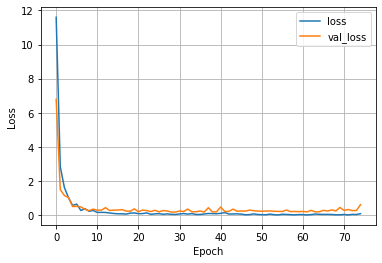

In [ ]:
plot_loss(history_base_model)

In [ ]:
import pandas as pd

history_dataframe = pd.DataFrame(history_base_model.history)
history_dataframe['epoch'] = history_base_model.epoch
history_dataframe.describe()

,loss,accuracy,val_loss,val_accuracy,epoch
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.308965,0.965599,0.396391,0.947385,37.000000
std,1.377161,0.067446,0.777206,0.057662,21.794495
min,0.006747,0.510574,0.172589,0.503846,0.000000
25%,0.032814,0.971299,0.210156,0.950000,18.500000
50%,0.062429,0.981873,0.254238,0.961538,37.000000
75%,0.094230,0.989426,0.308246,0.965385,55.500000
max,11.598533,0.996979,6.787367,0.973077,74.000000


In [ ]:
loss, accuracy = fine_tuned_model.evaluate(test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

3/3 - 2s - loss: 0.6106 - accuracy: 0.9308
Test accuracy: 0.9307692050933838
Test loss: 0.6105566620826721


# Assignment

1. Tambahkan convolution layer berikut untuk data yang sudah dilakukan data augmentation:

    - Convolution layer dengan 32 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2
    - Convolution layer dengan 64 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2
    - Convolution layer dengan 128 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2

  Bandingkan hasil accuracy yang didapat dengan ketika training dilakukan dengan model baseline! Jelaskan kesimpulannya! Gunakan nilai epoch 100. Lalu bandingkan juga plot epoch terhadap lossnya!

2. Tentukan arsitektur CNN serta hyperparameter tuning bagi mendapatkan hasil terbaik untuk dataset ini!